In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
% cd /content/drive/'My Drive'/Internship2


In [0]:
# import pandas as pd
# import matplotlib.cm as cm
# import matplotlib.pyplot as plt
# import numpy as np
# Xtrain = pd.read_pickle("X_train.pickle")
# df_train = np.array(df_train)

In [0]:
import pickle
import numpy as np
pickle_in = open("X_train.pickle","rb")
Xtrain = pickle.load(pickle_in)
Xtrain = np.array(Xtrain)
pickle_in = open("X_val.pickle","rb")
Xtest = pickle.load(pickle_in)
Xtest = np.array(Xtest)
pickle_in = open("y_train.pickle","rb")
ytrain = pickle.load(pickle_in)
ytrain = np.array(ytrain)
pickle_in = open("y_val.pickle","rb")
ytest = pickle.load(pickle_in)
ytest = np.array(ytest)

In [0]:
nsamples, nx, ny,a = Xtrain.shape
Xtrain = Xtrain.reshape((nsamples,nx*ny))

nsamples, nx, ny,a = Xtest.shape
Xtest = Xtest.reshape((nsamples,nx*ny))


In [0]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [0]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73        26
           1       0.65      0.60      0.63        25
           2       0.52      0.63      0.57        19
           3       0.65      0.68      0.67        22

    accuracy                           0.65        92
   macro avg       0.65      0.65      0.65        92
weighted avg       0.66      0.65      0.65        92



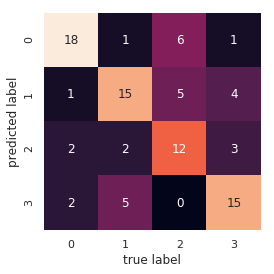

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');